# Outlet Gage Selection

In [4]:
# IMPORTS
import os

os.chdir('C:\\Users\\kondris\\Documents\\GitHub\\HighMagFlows_EPA_Project')

import pandas as pd 
import numpy as np
import seaborn as sns
import geopandas as gpd
#import pygeos
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#import contextily as cx
import requests
import calendar
from importlib import reload
import mapclassify as mc
from dataretrieval import nwis

from datetime import datetime, timedelta
from shapely.geometry import Point
from io import StringIO
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch

# Custom modules are imported in multiple locations to faciliate easy reloading when edits are made to their respective files
import Src.classes as cl
import Src.func_ko as fn
reload(cl)
reload(fn)

<module 'Src.func_ko' from 'C:\\Users\\kondris\\Documents\\GitHub\\HighMagFlows_EPA_Project\\Src\\func_ko.py'>

In [5]:
gpd.show_versions()
print(f"pygeos version: {pygeos.__version__}")
print(f"geos version: {pygeos.geos_version}")
gpd.options.use_pygeos = True
print(f"use pygeos? {gpd.options.use_pygeos}")


SYSTEM INFO
-----------
python     : 3.10.14 | packaged by Anaconda, Inc. | (main, May  6 2024, 19:44:50) [MSC v.1916 64 bit (AMD64)]
executable : C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\python.exe
machine    : Windows-10-10.0.19045-SP0

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : 3.11.4
GEOS lib   : None
GDAL       : 3.8.5
GDAL data dir: C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\lib\site-packages\pyogrio\gdal_data\
PROJ       : 9.3.0
PROJ data dir: C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\lib\site-packages\pyproj\proj_dir\share\proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 1.0.1
numpy      : 2.0.1
pandas     : 2.2.2
pyproj     : 3.6.1
shapely    : 2.0.5
pyogrio    : 0.9.0
geoalchemy2: None
geopy      : None
matplotlib : 3.9.1
mapclassify: 2.8.0
fiona      : None
psycopg    : None
psycopg2   : None
pyarrow    : None


NameError: name 'pygeos' is not defined

In [6]:


gpd.sjoin_nearest(gpd.GeoDataFrame(geometry=[]), gpd.GeoDataFrame(geometry=[]))

Empty GeoDataFrame
Columns: [geometry, index_right]
Index: []

## Import gages (valid only with site names)

In [7]:
# Dataset upload
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_95.xlsx'    
}

#dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}
dfs_valid = {key: pd.read_excel(path) for key, path in data_paths.items()}

In [8]:
# Number of valid gages
date_ranges = ['30', '50']
percentiles = ['90', '95']
for date_range in date_ranges:
    for percentile in percentiles: 
        df_length = dfs_valid[f'{date_range}_{percentile}']
        print(f'{date_range}-Year gages (valid = True): {len(df_length)}')

30-Year gages (valid = True): 4242
30-Year gages (valid = True): 4242
50-Year gages (valid = True): 3314
50-Year gages (valid = True): 3314


## Import gages (valid and invalid)

In [7]:
# Dataset upload
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/National_Metrics_50_95.xlsx'    
}

#dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}
dfs_metrics = {key: pd.read_excel(path) for key, path in data_paths.items()}

In [25]:
# Print length of dfs_metrics
date_ranges = ['30', '50']
percentiles = ['90', '95']
for date_range in date_ranges:
    for percentile in percentiles: 
        print(len(dfs_metrics[f'{date_range}_{percentile}']))

7914
7914
7914
7914


In [8]:
# Converts site_no to strings
for date_range in date_ranges:
    for percentile in percentiles: 
        # Assuming df is your DataFrame and 'column_name' is the name of the column with numbers
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].astype(str)  # Convert numbers to strings

        # Add leading '0' to numbers with 7 digits
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

In [9]:
# Valid gages
date_ranges = ['30', '50']
percentiles = ['90', '95']
dfs_valid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_valid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == True]
        
dfs_invalid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_invalid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == False]

In [5]:
# Number of valid gages
for date_range in date_ranges:
    for percentile in percentiles: 
        df_length = dfs_valid[f'{date_range}_{percentile}']
        print(f'{date_range}-Year gages (valid = True): {len(df_length)}')

30-Year gages (valid = True): 4242
30-Year gages (valid = True): 4242
50-Year gages (valid = True): 3314
50-Year gages (valid = True): 3314


### Add station names to df

In [14]:
# Add names to 50-year dfs_valid
gage_names_50 = []
for site in dfs_valid[f'50_90']['site_no'].unique():
    temp_df = nwis.get_record(sites=str(site), service='site')
    gage_name = temp_df['station_nm'][0]
    #print(gage_name)
    gage_names_50.append(gage_name)
    #print(gage_names_50)

2342500


ValueError: Bad Request, check that your parameters are correct. URL: https://waterservices.usgs.gov/nwis/site?sites=2342500&siteOutput=Expanded&format=rdb

In [32]:
# Add names to 30-year dfs_valid
gage_names_30 = []
for site in dfs_valid[f'30_90']['site_no'].unique():
    #print(site)
    try:
        temp_df = nwis.get_record(sites=site, service='site')
        gage_name = temp_df['station_nm'][0]
    except Exception as e:
        gage_name = 'station_name_error'
    #print(site, gage_name)
    gage_names_30.append(gage_name)

In [36]:
# Assign gage names as column and save to Excel
dfs_valid['30_90']['station_nm'] = gage_names_30
dfs_valid['30_90'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_90.xlsx')

dfs_valid['30_95']['station_nm'] = gage_names_30
dfs_valid['30_95'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_30_95.xlsx')

dfs_valid['50_90']['station_nm'] = gage_names_50
dfs_valid['50_90'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_90.xlsx')

dfs_valid['50_95']['station_nm'] = gage_names_50
dfs_valid['50_90'].to_excel(f'Prelim_Data/National_Metrics/Station_names/National_Metrics_50_95.xlsx')

C:\Users\kondr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kondr\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kondr\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

## Plot valid gages on map

### Import aquifers, lower48, and HUC2s

In [98]:
# Aquifers to plot and dataset to use
lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
aq_shape = gpd.read_file('ShapeFiles/Aquifers/_Master_Aquifer/master_aquifer.shp')
aq_usgs = gpd.read_file('ShapeFiles/Aquifers_USGS/us_aquifers.shp')
stream_network = gpd.read_file('ShapeFiles/Streams_US/stream_network.shp')
#stream_network_detailed = gpd.read_file('ShapeFiles/Streams_US/us_streams_detailed.shp')
aq_usgs_selected_10 = gpd.read_file('ShapeFiles/Aquifers_USGS_10/Aquifers_USGS_10.shp')
aq_usgs_selected_25 = gpd.read_file('ShapeFiles/Aquifers_USGS_25/Aquifers_USGS_25.shp')
huc2 = gpd.read_file('ShapeFiles/_Master_HUC2/master_huc2.shx')
geo_df = gpd.read_file('ShapeFiles/Streams_US/metrics_stream_order_30_90.shp')
dams_df = gpd.read_file('ShapeFiles/Dams_US/US_dams_shp.shp')
aq_usgs_glac = gpd.read_file('ShapeFiles/Aquifers_USGS_glacial/Aquifers_USGS_glacial.shp')
aq_usgs_selected_10_glac = gpd.read_file('ShapeFiles/Aquifers_USGS_10_glacial/Aquifers_USGS_10_glacial.shp')
aq_usgs_selected_25_glac = gpd.read_file('ShapeFiles/Aquifers_USGS_25_glacial/Aquifers_USGS_25_glacial.shp')

### Add Strahler stream order to geodf of valid sites

Convert df to geo_df

In [60]:
# Set epsg
#epsg = 3035 #4269 is original, 4326 does not work

In [66]:
# Work with the 30-year, 90th percentile df
df = dfs_valid['30_90']

# Makes lists of lat and long and combine into one point
lat = df['dec_lat_va'].tolist()
long = df['dec_long_va'].tolist()
geometry = [Point(xy) for xy in zip(long, lat)]

# Add column for geometry to df
df['geometry'] = geometry

# Create geo
geo_df = gpd.GeoDataFrame(df, crs=4269, geometry=geometry)
geo_df = geo_df.to_crs(epsg=4269)

<Axes: >

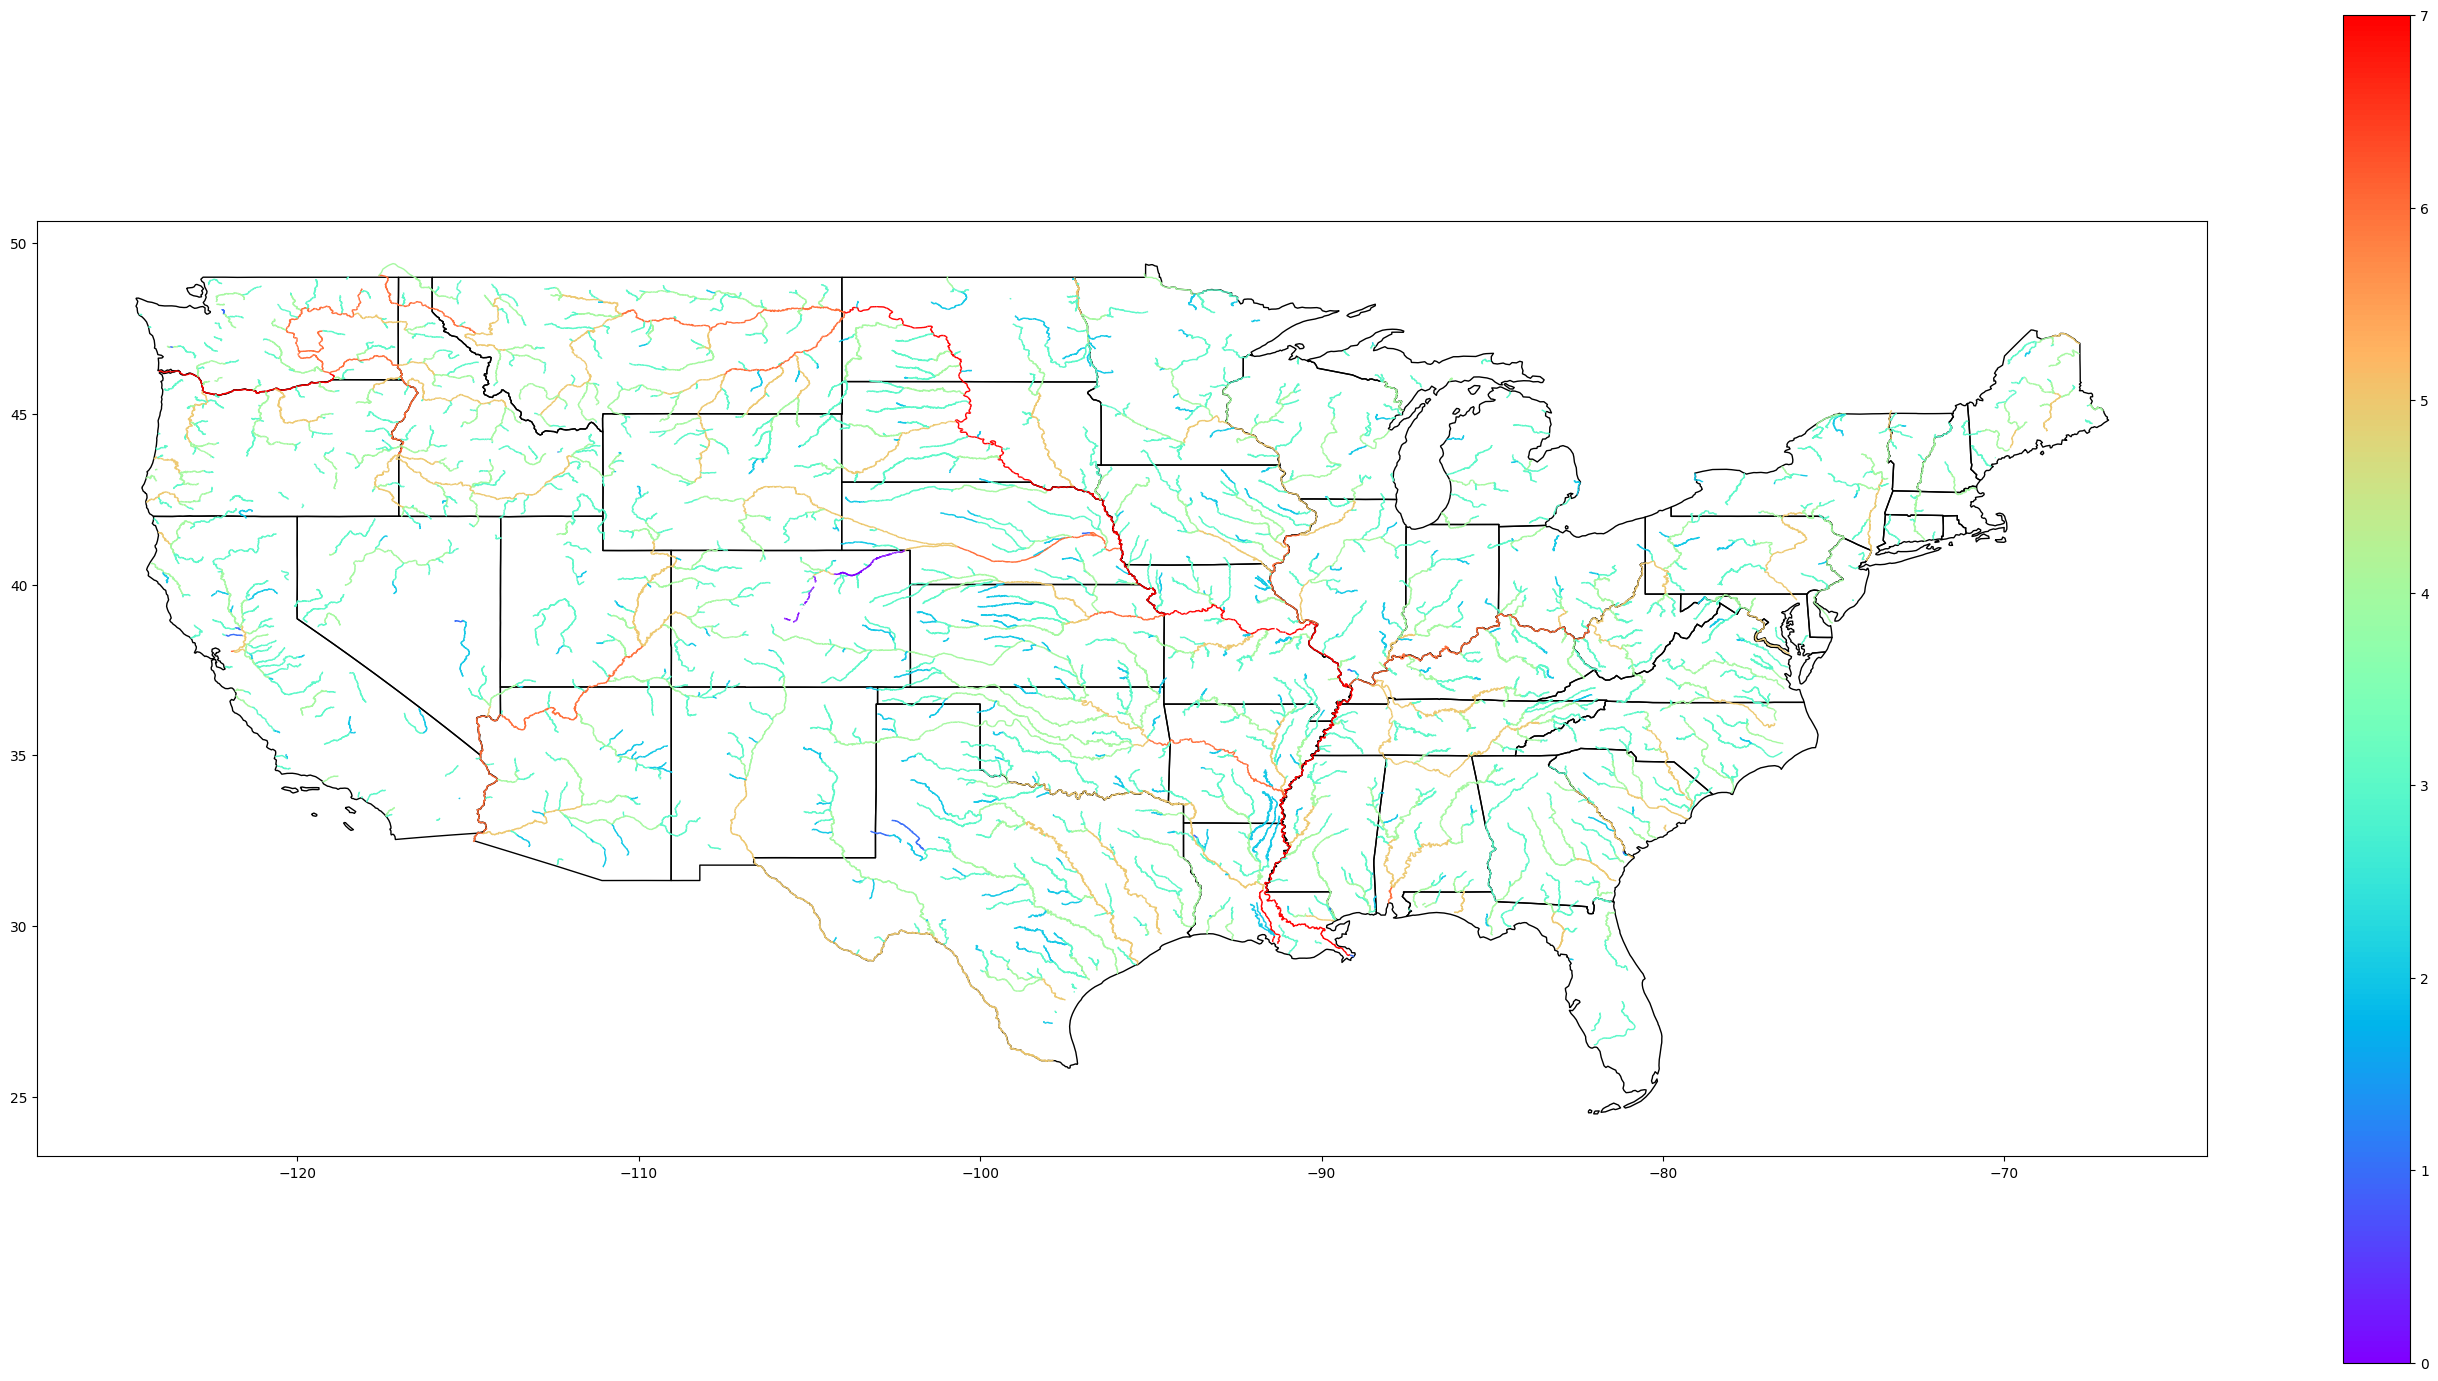

In [70]:
fig, ax = plt.subplots(figsize=(35, 35))

lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
lower48 = lower48.to_crs(epsg=4269)
#lower48 = lower48.to_crs(epsg=3035)
#lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

stream_network = gpd.read_file('ShapeFiles/Streams_US/stream_network.shp')
stream_network.crs = "epsg:3035"
#stream_network = stream_network.to_crs(crs=4269)
stream_network = stream_network.to_crs(crs=3035)
#stream_network = stream_network.to_crs('ESRI:102003')
stream_network.plot(ax=ax, column='STRAHLER', cmap='rainbow', linewidth=1, 
                    alpha=0.98, legend=True, legend_kwds={"shrink":.5}) 

<Axes: >

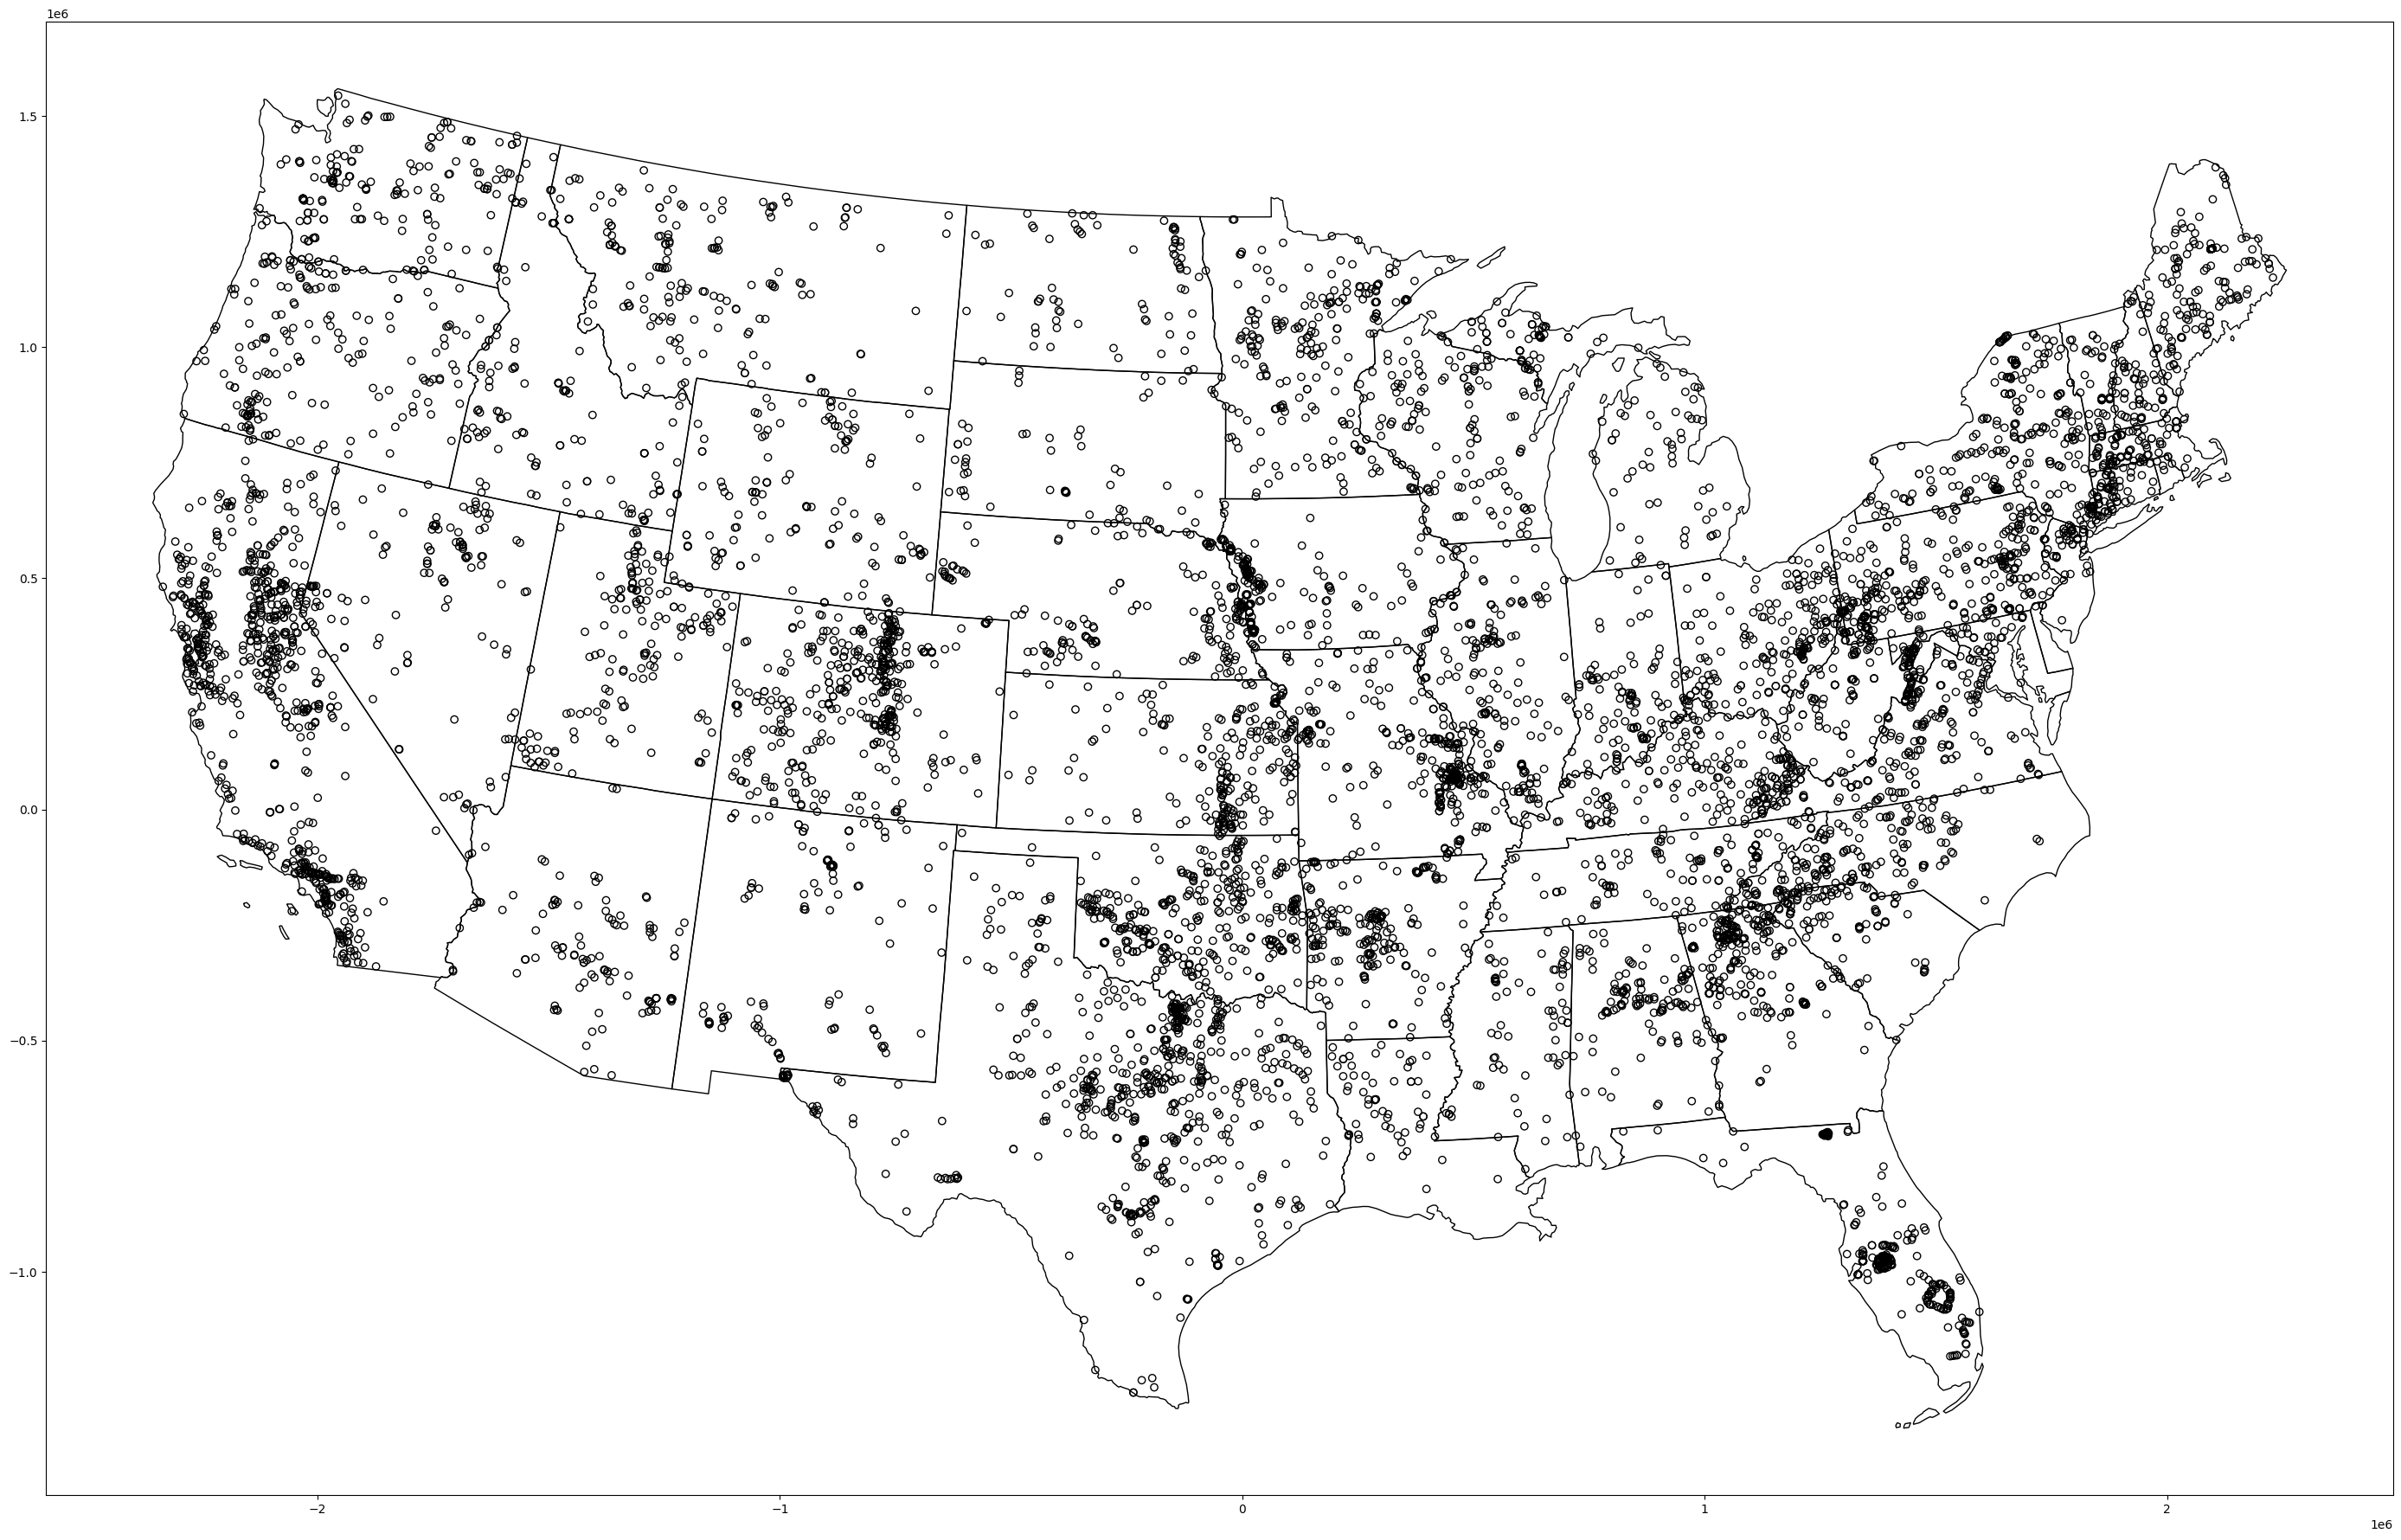

In [45]:
# Plot map with dams
fig, ax = plt.subplots(figsize=(35, 35))

lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
#lower48 = lower48.to_crs(epsg=4269)
#lower48 = lower48.to_crs(epsg=3035)
lower48 = lower48.to_crs('ESRI:102003')

dams_df = gpd.read_file('ShapeFiles/Dams_US/US_dams_shp.shp')
dams_df = dams_df.to_crs('ESRI:102003')
dams_df_clip = dams_df.clip(lower48)

lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 
dams_df_clip.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0)

In [15]:
# Add stream_network columns to geo_df
geo_df = geo_df.sjoin_nearest(stream_network, how='inner')

In [16]:
# Save combined geo_df
geo_df_no_datetime = geo_df.drop(columns=['analyze_start', 'analyze_end', 'data_start', 'data_end'])
geo_df_no_datetime.to_file('ShapeFiles/Streams_US/metrics_stream_order_30_90.shp', driver='ESRI Shapefile')

C:\Users\kondris\AppData\Local\Temp\ipykernel_7856\3087499596.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geo_df_no_datetime.to_file('ShapeFiles/Streams_US/metrics_stream_order_30_90.shp', driver='ESRI Shapefile')
C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'Unnamed: 0' to 'Unnamed_ 0'
  ogr_write(
C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'analyze_range' to 'analyze_ra'
  ogr_write(
C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'missing_data%' to 'missing_da'
  ogr_write(
C:\Users\kondris\AppData\Local\anaconda3\envs\EPA_EAR_Project\lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field 

In [74]:
# Check that new columns are in geo_df
geo_df.head()

Unnamed_ 0  site_no  analyze_ra  quantile  valid  missing_da  threshold  \
0           1  2342500          30       0.9      1         0.0      850.3   
1           2  2361000          30       0.9      1         0.0     1770.0   
2           4  2363000          30       0.9      1         0.0     1300.0   
3           6  2369800          30       0.9      1         0.0      261.0   
4           7  2371500          30       0.9      1         0.0     1380.0   

   hmf_years  annual_hmf  six_mo_hmf  ...  LOWV  WORKA  GAGECODE  STRAHLER  \
0         30    0.109441    0.095362  ...  1.75      0         1         3   
1         30    0.155185    0.118945  ...  0.46      1         1         3   
2         30    0.114796    0.092049  ...  0.35      0         1         3   
3         29    0.027931    0.016594  ...  0.74      1         1         3   
4         30    0.117638    0.091072  ...  0.47      1         1         2   

            RR        DSRR  HUC2  HUC4   HUC6  \
0  03130003022  3130003021     3   313  31300   
1  03140201016  3140201010     3   314  31402   
2  03140202014  3140202013     3   314  31402   
3  03140103023  3140103011     3   314  31401   
4  03140301006  3140301005     3   314  31403   

                               geometry  
0  POINT (-2162146.61985 6185311.07433)  
1  POINT (-2265743.09896 6193912.19624)  
2  POINT (-2242533.46679 6224313.13565)  
3  POINT (-2308144.10986 6288622.34837)  
4  POINT (-2249380.75985 6270229.81849)  

[5 rows x 89 columns]

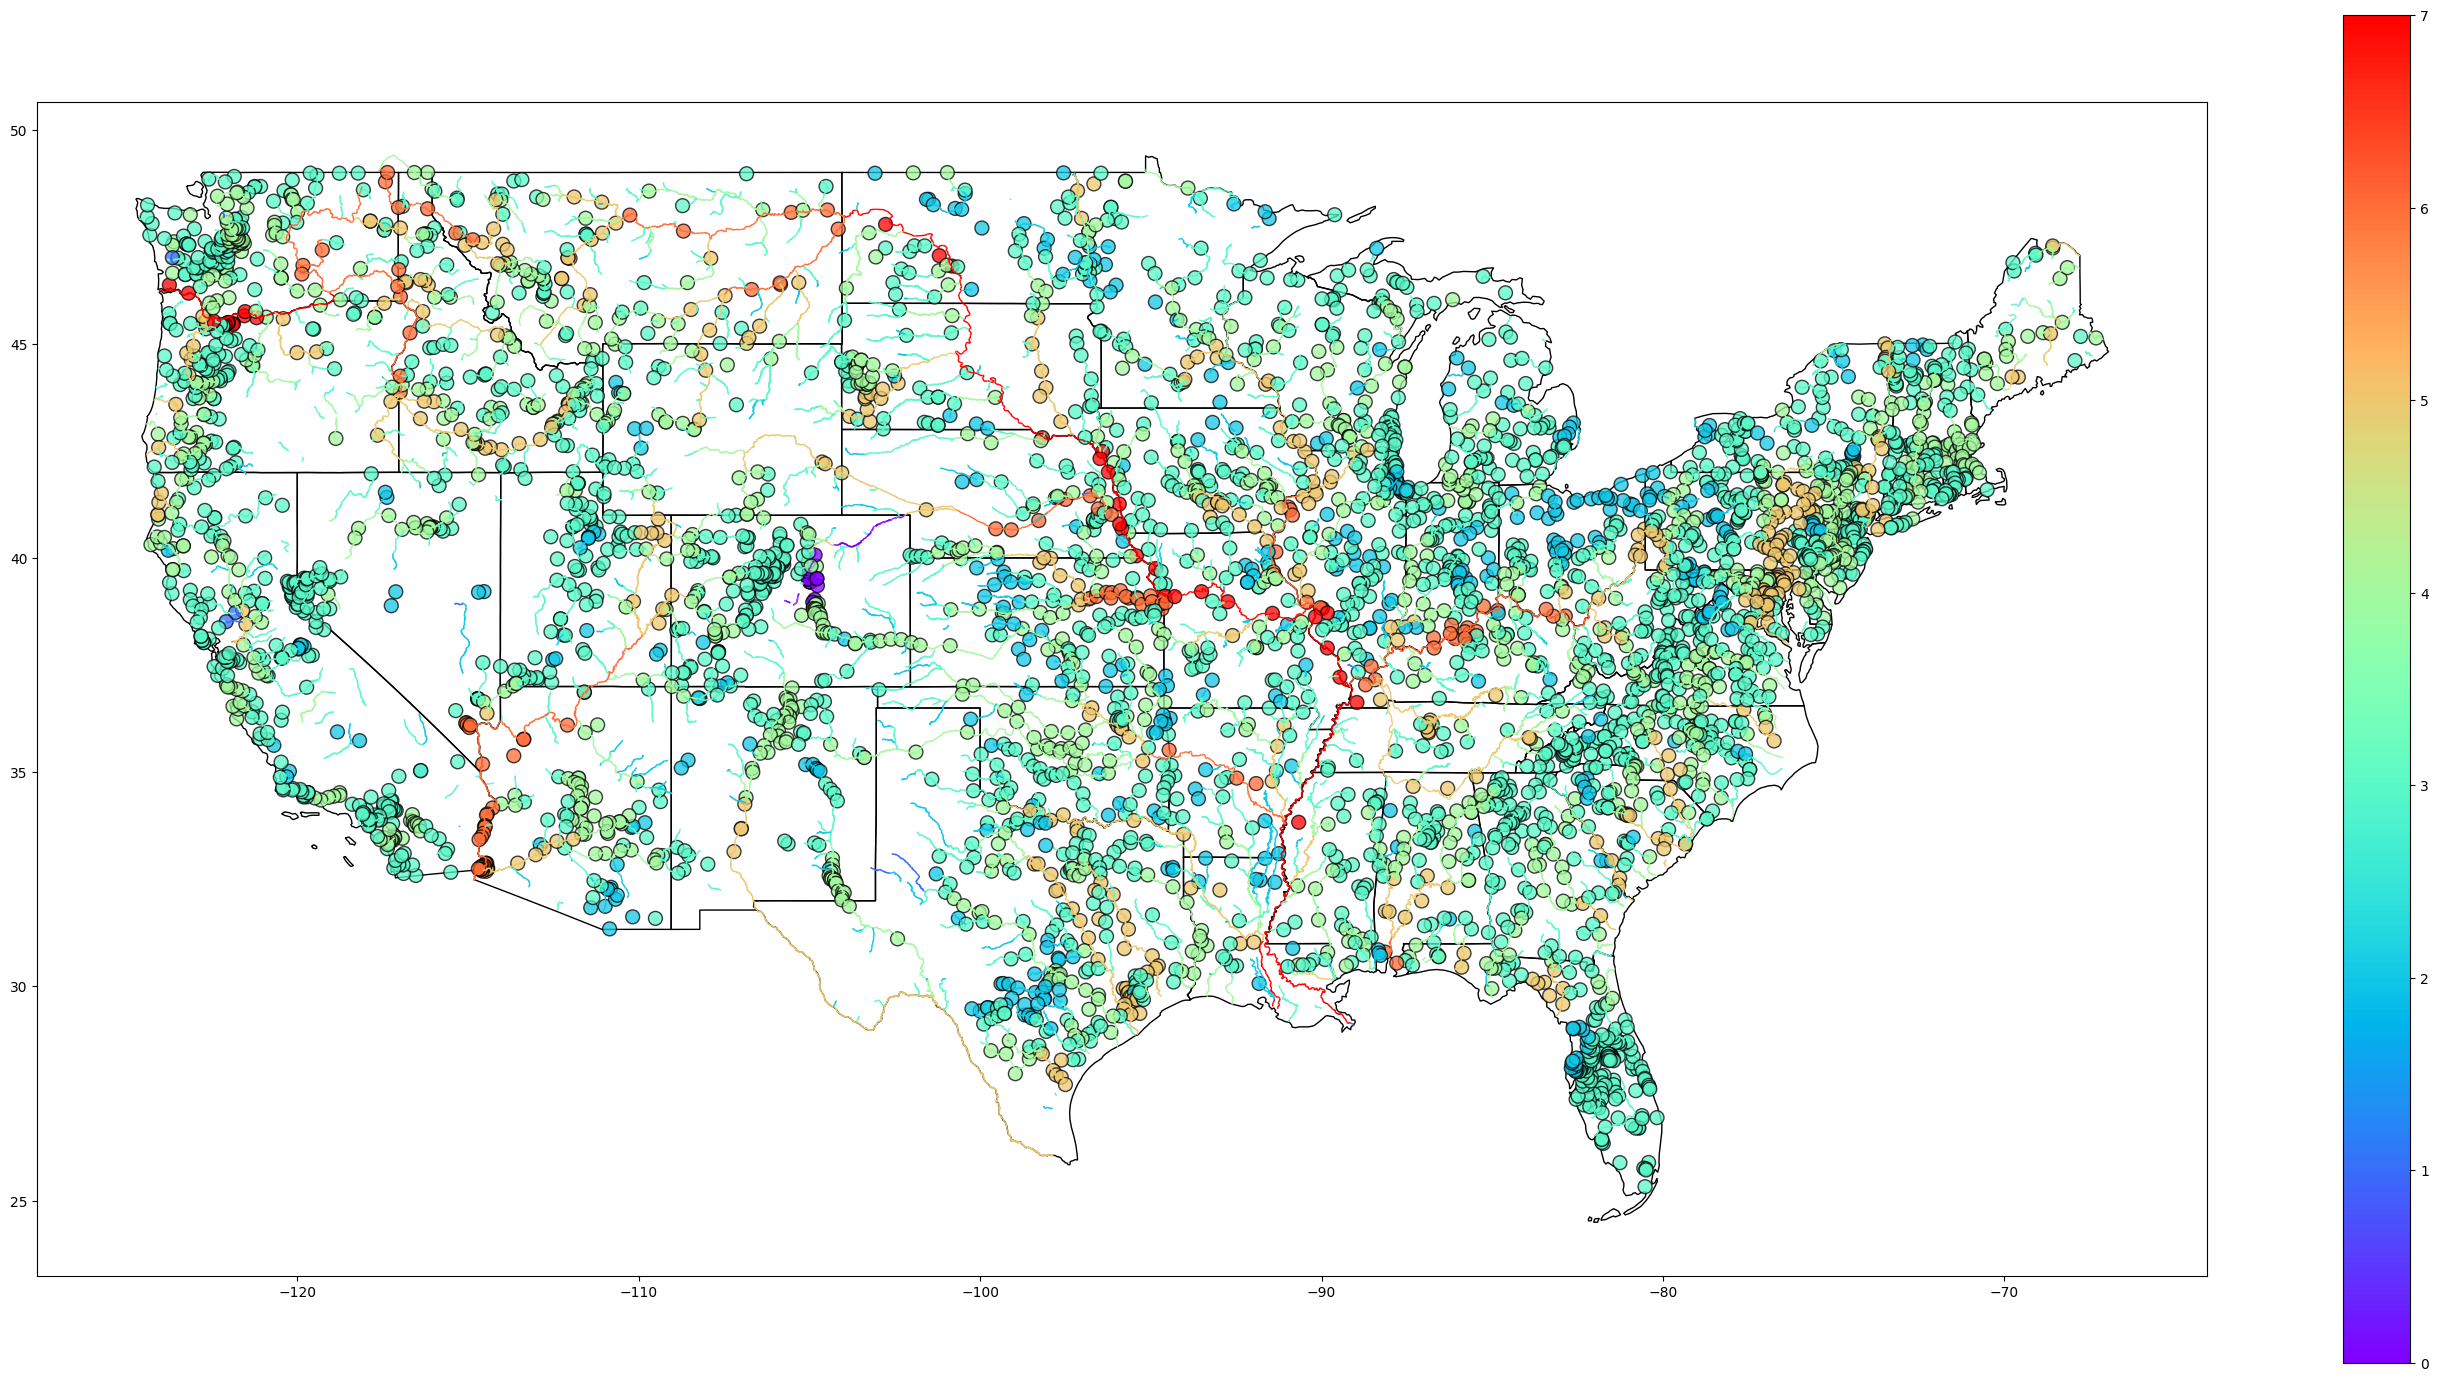

In [93]:
fig, ax = plt.subplots(figsize=(35, 35))

lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
lower48 = lower48.to_crs(epsg=4269)
#lower48 = lower48.to_crs(epsg=3035)
#lower48 = lower48.to_crs('ESRI:102003')
lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 

lower48_crs = lower48.crs

stream_network.crs = "epsg:4269"
stream_network = stream_network.to_crs(epsg=4269)
stream_network.plot(ax=ax, column='STRAHLER', cmap='rainbow', linewidth=1, alpha=0.98, 
                    legend=True, legend_kwds={"shrink":.5}) 

geo_df = gpd.read_file('ShapeFiles/Streams_US/metrics_stream_order_30_90.shp')
# geo_df = geo_df.set_crs(lower48_crs, allow_override=True)  # Set CRS to match lower48
# geo_df = geo_df.to_crs(lower48_crs)  # Transform to lower48 CRS
geo_df.crs = "epsg:3035"
geo_df = geo_df.to_crs(crs=4269)
bx = geo_df.plot(ax=ax, column='STRAHLER', cmap='rainbow', marker='o', markersize=100, 
                         edgecolor='black', linewidth=1, alpha=0.75, legend=False, legend_kwds={"shrink":.5})

In [20]:
# Plot gages
def plot_valid_gages(date, percentile):
    df = dfs_valid[f'{date_range}_{percentile}']
    fig, ax = plt.subplots(figsize=(35, 35))
    
    plt.title(f'Valid Gages ({date}-yr Range, {percentile}th Percentile)', fontsize=30)

    lower48 = gpd.read_file('ShapeFiles/Lower48/lower48.shp')
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1.0) 
    
    stream_network.plot(ax=ax, color='blue', linewidth=1.5, alpha=0.8, zorder=2) 

    lat = df['dec_lat_va'].tolist()
    long = df['dec_long_va'].tolist()
    geometry = [Point(xy) for xy in zip(long, lat)]
    geo_pts = gpd.GeoDataFrame(geometry=geometry)

    bx = geo_pts.plot(ax=ax, color='green', marker='o', markersize=100, 
                         edgecolor='black', linewidth=1, alpha=0.75, legend=True) 

    plt.axis("off")

    plt.show()
    return

#for date in date_ranges:
#    for percentile in percentiles:
#        plot_valid_gages(date, percentile)

### Plotly map of all gages

In [108]:
import plotly.express as px

df_1 = geo_df.copy()

# The metric to color the datapoints by
#color_metric = "inter_annual%"
# The metric to size the datapoints by
size_metric = "STRAHLER"
#size_metric = 'annual_hmf'

df_1 = df_1.sort_values(by=size_metric, ascending=True)

fig = px.scatter_mapbox(df_1, lat="dec_lat_va", lon="dec_long_v", hover_name='site_no', 
                        hover_data=["site_no", "station_nm","annual_hmf"], color=size_metric,
                        zoom=3, height=700, width=1200, color_continuous_scale=px.colors.sequential.Bluered, opacity=0.75)

# fig.add_trace(px.choropleth_mapbox(aq_usgs_selected_10, 
#                                     geojson=aq_usgs_selected_10.geometry, 
#                                     #locations=aq_usgs_selected_10.index, 
#                                     color='Shape_Area', 
#                                     hover_name='AQ_NAME').data[0])

# aq_usgs_selected_10 = aq_usgs_selected_25.to_crs(epsg=4269)
# fig = px.choropleth_mapbox(aq_usgs_selected_10, 
#                             geojson=aq_usgs_selected_10.geometry, 
#                             color='Shape_Area',
#                             #locations=aq_usgs_selected_10.index,
#                             hover_name='AQ_NAME')
              
# fig = px.choropleth(aq_usgs_selected_10,
#                    geojson=aq_usgs_selected_10.geometry,
#                    locations=aq_usgs_selected_10.index,
#                    color="Shape_Area")
#                    #projection="mercator")

# aq_usgs_selected_10 = aq_usgs_selected_25.to_crs(epsg=4269)
# aq_shape_1 = aq_usgs_selected_10[aq_usgs_selected_10['AQ_NAME'] == aquifer_name]
# aq_shape_1.plot(ax=ax, facecolor='darkgrey', edgecolor='red', linewidth=2.0, alpha=0.8)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_geos(fitbounds="locations", visible=False)

import plotly.io as pio
pio.renderers.default = 'iframe'

fig.show()

## Gages for individual aquifers

In [100]:
aq_list_10 = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system']

aq_list_25 = ['Southeastern Coastal Plain aquifer system',
       'Coastal lowlands aquifer system', 'Floridan aquifer system',
       'Valley and Ridge aquifers',
       'Piedmont and Blue Ridge crystalline-rock aquifers',
       'Mississippi embayment aquifer system',
       'Basin and Range basin-fill aquifers',
       'Mississippi River Valley alluvial aquifer',
       'Pacific Northwest basin-fill aquifers',
       'California Coastal Basin aquifers',
       'Central Valley aquifer system',
       'Pacific Northwest basaltic-rock aquifers',
       'Northern Atlantic Coastal Plain aquifer system',
       'Surficial aquifer system', 'Biscayne aquifer',
       'Northern Rocky Mountains Intermontane Basins aquifer system',
       'Snake River Plain basaltic-rock aquifers',
       'Columbia Plateau basaltic-rock aquifers',
       'Cambrian-Ordovician aquifer system', 'Silurian-Devonian aquifers',
       'Lower Cretaceous aquifers', 'High Plains aquifer',
       'Rio Grande aquifer system', 'Edwards-Trinity aquifer system',
       'Willamette Lowland basin-fill aquifers']

selected_aq_list_10_glac = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Aquifers of Alluvial and Glacial Origin',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers']

selected_aq_list_25_glac = ['High Plains aquifer',
                'Mississippi River Valley alluvial aquifer',
                'Central Valley aquifer system',
                'Basin and Range basin-fill aquifers',
                'Aquifers of Alluvial and Glacial Origin',
                'Floridan aquifer system',
                'Snake River Plain basaltic-rock aquifers',
                'Coastal lowlands aquifer system',
                'California Coastal Basin aquifers', 
                'Pacific Northwest basin-fill aquifers',
                'Northern Atlantic Coastal Plain aquifer system',
                'Columbia Plateau basaltic-rock aquifers',
                'Rio Grande aquifer system',
                'Mississippi embayment aquifer system',
                'Cambrian-Ordovician aquifer system',
                'Southeastern Coastal Plain aquifer system',
                'Biscayne aquifer',
                'Edwards-Trinity aquifer system',
                'Northern Rocky Mountains Intermontane Basins aquifer system',
                'Piedmont and Blue Ridge crystalline-rock aquifers',
                'Surficial aquifer system',
                'Valley and Ridge aquifers',
                'Silurian-Devonian aquifers',
                'Pacific Northwest basaltic-rock aquifers',
                'Willamette Lowland basin-fill aquifers']

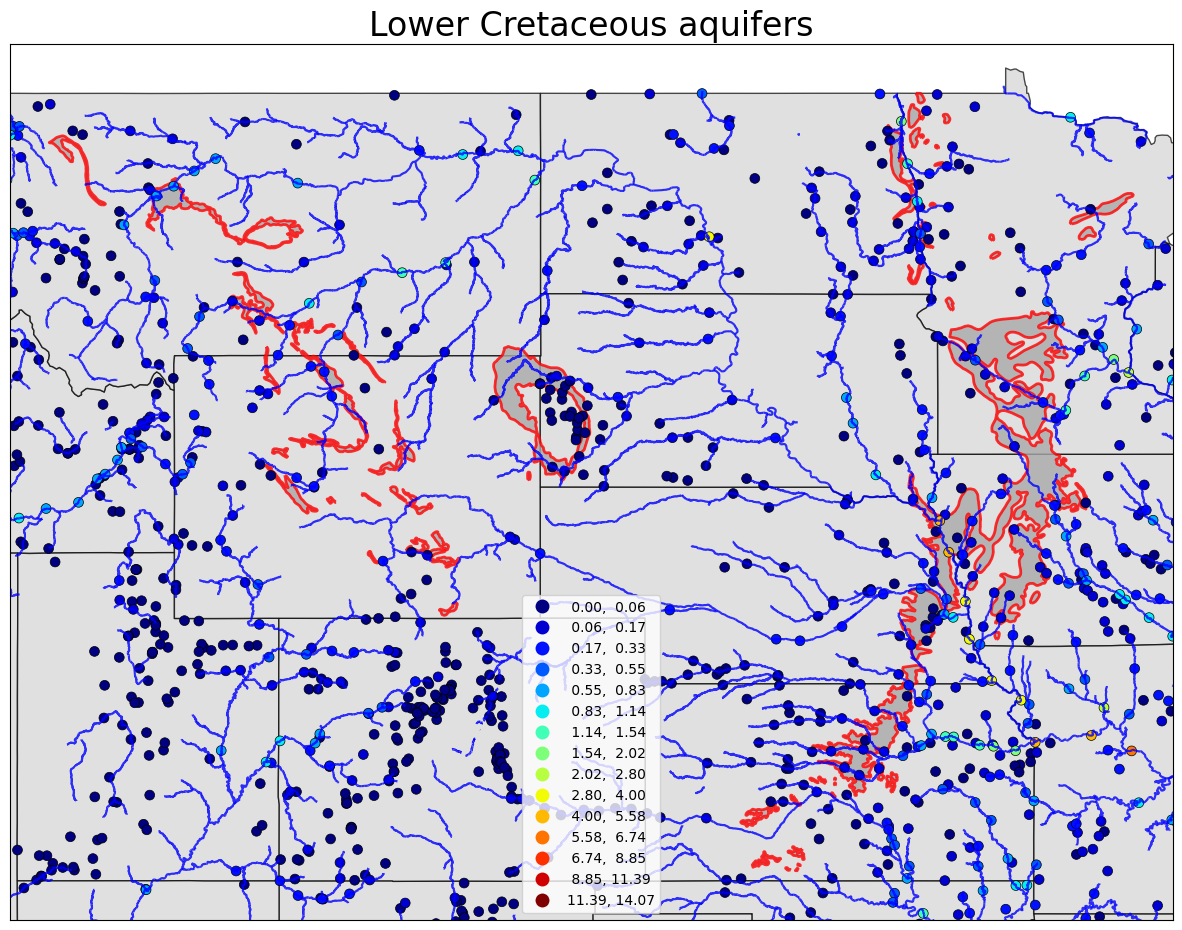

In [112]:
overwrite = True

def plot_single_aquifer(aquifer_name, lower48, df):
    fig, ax = plt.subplots(figsize=(15, 15))
    #plt.title(f"Multi-Aquifer {metric} Plot for {range} Years & {quantile}th Quantile", loc='center', fontsize=24)
    plt.title(f'{aquifer_name}', fontsize=24)

    # Lower-48 Plot
    lower48 = lower48.to_crs(epsg=4269)
    #lower48 = lower48.to_crs('ESRI:102003')
    lower48.plot(ax=ax, edgecolor='black', facecolor='lightgrey', linewidth=1.0, alpha=0.7) 

    #stream_network = stream_network.to_crs(epsg=4269)
    stream_network.plot(ax=ax, color='blue', linewidth=1.5, alpha=0.8, zorder=2) 

    aq_usgs_selected_25 = gpd.read_file('ShapeFiles/Aquifers_USGS_25/Aquifers_USGS_25.shp')
    aq_usgs_selected_25 = aq_usgs_selected_25.to_crs(epsg=4269)
    aq_shape_1 = aq_usgs_selected_25[aq_usgs_selected_25['AQ_NAME'] == aquifer_name]
    aq_shape_1.plot(ax=ax, facecolor='darkgrey', edgecolor='red', linewidth=2.0, alpha=0.8)
    
    lat = df['dec_lat_va'].tolist()
    long = df['dec_long_va'].tolist()
    geometry = [Point(xy) for xy in zip(long, lat)]
    geo_pts = gpd.GeoDataFrame(geometry=geometry)
    df = df.reset_index()
    geo_df = geo_pts.merge(df, how='left', left_index=True, right_index=True)

    classifier = mc.NaturalBreaks(geo_df['annual_hmf'], k=15)
    geo_df = geo_df.sort_values('annual_hmf', ascending=True)

    #bx = geo_df.plot(ax=ax, color='green', marker='o', markersize=50, 
    #                     edgecolor='black', linewidth=1, alpha=0.75, legend=True) 

    cmap='jet' #'rainbow_r'
    geo_df = geo_df.set_geometry("geometry_x")
    geo_df.crs = "epsg:4269"
    geo_df = geo_df.to_crs(epsg=4269)
    geo_df.plot(ax=ax, column='annual_hmf', scheme='user_defined', classification_kwds={'bins': classifier.bins}, 
                cmap=cmap, legend=True, #legend_kwds=legend_frmt, 
                alpha=1.0, marker='o', 
                markersize=50,
                edgecolor='black', linewidth=0.5)

    #xmin, xmax, ymin, ymax = fn.set_plot_bounds(aq_shape_1, padding=30.0)

    xmin, ymin, xmax, ymax = aq_shape_1.total_bounds
    padding = 0.75
    xmin -= padding
    ymin -= padding
    xmax += padding
    ymax += padding

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_yticks([])
    ax.set_xticks([])
    
    img_path = f'Saved_Visuals/Aquifers/{aquifer_name}_gages.png'
    fn.save_plot_as_image(img_path, overwrite) 

    plt.show()
    
# for aquifer_name in aq_list_25:
#     plot_single_aquifer(aquifer_name, lower48, dfs_valid['30_90'])

aquifer_name = 'Lower Cretaceous aquifers'
plot_single_aquifer(aquifer_name, lower48, dfs_valid['30_90'])

In [117]:
# Outlet gages by aquifer
br_outlet_gages = ['09520500', '09429600', '09521100', '09519800', '09468500', '09423000', '10327500', '10351650', '10351650', '10311400']
cc_outlet_gages = ['11023000', '11046000', '11078000', '11087020', '11133000', '11140000', '11152500', '11159000', '11467000', '11477000', '11530500', '11532500']
cv_outlet_gages = ['11303500', '11447650']
cl_outlet_gages = ['08211000', '08188500', '08176500', '08164000', '08162000', '08116650', '08066500', '08033500', '08068000', '08030500',
      '08013500', '08012000', '07378500', '02492000', '02489500', '02479000', '02479300', '02469761', '02428400', '02375500']
fl_outlet_gages = ['02368000', '02365500', '02358000', '02320500', '02313230']
hp_outlet_gages = ['06465500', '06805500', '06853500’, ‘06884000’, '07144550’, ‘0758000’, ‘07237500’, ‘07228000’, ‘07297910’, ‘08123850’]
mr_outlet_gages = ['07077000', '07077555', '07047942', '07369000', '07369000', '07285500', '07268000']
na_outlet_gages = ['02105769', '02089500', '02091500', '02083500',  '02085000', '02052000', '02047000', '02049500',  '02041650', '02037500', '01668000', 
      '01673000',  '01646500', '01578310', '01474500',  '01463500']
pn_outlet_gages = ['11039800', '12200500', '12040500', '14211720',  '14372300']
sr_outlet_gages = ['13269000']
cp_outlet_gages = ['13342500', '13334300', '12472800', '12510500', '13351000', '14033500', '14048000', '14103000']
rg_outlet_gages = ['08319000']
me_outlet_gages = ['07029500', '07268000', '07283000', '07285500', '07289350', '02482550', '02477000', '02469761', '02428400', 
                   '07362000', '07363500', '07348700']
co_outlet_gages = ['05378500', '05407000', '05437500', '04082400']
sc_outlet_gages = ['02130561', '02171500', '02197000', '02223248', '02343801', '02467000']
bi_outlet_gages = ['02287497', '02289060', '02290765', '02290769']
et_outlet_gages = ['07337000', '08062700', '08159200', '08168500']
rm_outlet_gages = ['12389000', '06066500', '13302500']
pb_outlet_gages = ['02341475', '02339500', '02347500', '02213000', '02223000', '02197000', '02169500', 
'02148000', '02130561', '02102500', '02089000', '02083500' ,'02080500', '01646500', '01578310']
sa_outlet_gages = ['02359170', '02243960', '02296750', '02292900', '02226000', '02202500', '02198500', '02175000', '02171645']
vr_outlet_gages = ['02388500', '02397000', '03513000', '03455000', '03168000', '02019500', '01638500', '01570500']
sd_outlet_gages = ['05465500', '05420500', '05527500', '03335500']
pnb_outlet_gages = ['13087995', '12395500']
wl_outlet_gages = ['14211720']
lc_outlet_gages = ['05476750', '05479000', '05482300', '05483450', '06602020', '06606600', '06607200',
       '06809210', '06486000', '06601200', '06864500', '06865500', '06868200', '06869500',
       '06876700', '06884025', '06884200', '05061500', '05304500', '05313500', '05317000',
       '05476000', '06078200', '06090300', '06200000', '06601000', '06803000', '06803500',
       '06803510', '06803530', '06804000', '06881000', '05085000', '06395000', '06400000',
       '06402500', '06406000', '06414000', '06430500', '06433000', '06436000', '06436190',
       '06429997', '06279500', '06634620']

outlet_gages_dict = {
    'br': br_outlet_gages, 
    'cc': cc_outlet_gages,
    'cv': cv_outlet_gages,
    'cl': cl_outlet_gages,
    'fl': fl_outlet_gages,
    'hp': hp_outlet_gages,
    'mr': mr_outlet_gages,
    'na': na_outlet_gages,
    'pn': pn_outlet_gages,
    'sr': sr_outlet_gages,
    'cp': cp_outlet_gages,
    'rg': rg_outlet_gages,
    'me': me_outlet_gages,
    'co': co_outlet_gages,
    'sc': sc_outlet_gages,
    'bi': bi_outlet_gages,
    'et': et_outlet_gages,
    'rm': rm_outlet_gages,
    'pb': pb_outlet_gages,
    'sa': sa_outlet_gages,
    'vr': vr_outlet_gages,
    'sd': sd_outlet_gages,
    'pnb': pnb_outlet_gages,
    'wl': wl_outlet_gages,
    'lc': lc_outlet_gages}




In [115]:
dfs_valid['30_90'].loc[dfs_valid['30_90']['within_aq'] == 'Lower Cretaceous aquifers']['site_no'].unique()

array([5476750, 5479000, 5482300, 5483450, 6602020, 6606600, 6607200,
       6809210, 6486000, 6601200, 6864500, 6865500, 6868200, 6869500,
       6876700, 6884025, 6884200, 5061500, 5304500, 5313500, 5317000,
       5476000, 6078200, 6090300, 6200000, 6601000, 6803000, 6803500,
       6803510, 6803530, 6804000, 6881000, 5085000, 6395000, 6400000,
       6402500, 6406000, 6414000, 6430500, 6433000, 6436000, 6436190,
       6429997, 6279500, 6634620])

In [126]:
# All gages - National metrics dfs
data_paths = {
    '30_90': 'Prelim_Data/National_Metrics/National_Metrics_30_90.xlsx',
    '50_90': 'Prelim_Data/National_Metrics/National_Metrics_50_90.xlsx',
    '30_95': 'Prelim_Data/National_Metrics/National_Metrics_30_95.xlsx',
    '50_95': 'Prelim_Data/National_Metrics/National_Metrics_50_95.xlsx'    
}

dfs_metrics = {key: pd.read_excel(path, sheet_name='site_metrics') for key, path in data_paths.items()}

date_ranges = ['30', '50']
percentiles = ['90', '95']
for date_range in date_ranges:
    for percentile in percentiles: 
        # Assuming df is your DataFrame and 'column_name' is the name of the column with numbers
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].astype(str)  # Convert numbers to strings

        # Add leading '0' to numbers with 7 digits
        dfs_metrics[f'{date_range}_{percentile}']['site_no'] = dfs_metrics[f'{date_range}_{percentile}']['site_no'].apply(lambda x: '0' + x if len(x) == 7 else x)

In [129]:
dfs_valid = {}
for date_range in date_ranges:
    for percentile in percentiles: 
        dfs_valid[f'{date_range}_{percentile}'] = dfs_metrics[f'{date_range}_{percentile}'][dfs_metrics[f'{date_range}_{percentile}']['valid'] == True]

In [130]:
df_30_90 = dfs_valid['30_90']

df_outlet_gages = {}
for key, value in outlet_gages_dict.items():
    df_outlet_gages[key] = df_30_90.loc[df_30_90['site_no'].isin(value)]

In [131]:
df_outlet_gages

{'br':        site_no analyze_start analyze_end  analyze_range  quantile  valid  \
 191   09468500    1990-10-01  2020-09-30             30       0.9   True   
 277   09519800    1990-10-01  2020-09-30             30       0.9   True   
 279   09520500    1990-10-01  2020-09-30             30       0.9   True   
 312   09423000    1990-10-01  2020-09-30             30       0.9   True   
 319   09429600    1990-10-01  2020-09-30             30       0.9   True   
 320   09521100    1990-10-01  2020-09-30             30       0.9   True   
 4413  10311400    1990-10-01  2020-09-30             30       0.9   True   
 4444  10327500    1990-10-01  2020-09-30             30       0.9   True   
 4470  10351650    1993-09-01  2020-09-30             28       0.9   True   
 
       missing_data%  threshold  hmf_years  annual_hmf  ...  dec_lat_va  \
 191            0.00      52.03         29    0.042054  ...   33.296447   
 277            0.00      93.00          8    1.063235  ...   33.075046 